In [1]:
import numpy as np
import time
import seaborn as sns
import pandas as pd
import math
import random
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from generate_datasets import make_checkerboard, make_spirals
from perceptron_implementation import VotedPerceptron

warnings.filterwarnings('ignore')

### Generated datasets

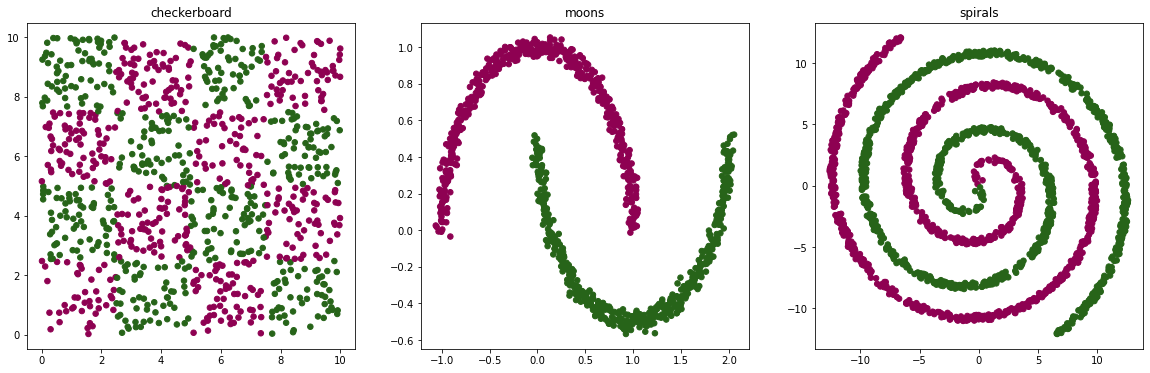

In [4]:
size = 16
length = 10
n_samples = 1000

plt.figure(figsize=(20, 6))
X, y = make_checkerboard(size, n_samples, length, noise=False)
plt.subplot(131)
plt.title("checkerboard")
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap='PiYG', s=30)

X, y = make_moons(n_samples, noise=0.03)
plt.subplot(132)
plt.title("moons")
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap='PiYG', s=30)

X, y = make_spirals(n_samples, noise=0.5)
plt.subplot(133)
plt.title("spirals")
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap='PiYG', s=30)

plt.show()

### Additional functions

In [5]:
params_counter = lambda clf: np.sum([np.size(c) for c in clf.coefs_])

def plot_results(dataset, clf, reshape):
    plt.figure(figsize=(6, 6))
    X_train, X_test, y_train, y_test = dataset
    X = np.vstack((X_train, X_test))
    y = np.hstack((y_train, y_test))
    [x1, x2] = np.meshgrid(np.linspace(np.nanmin(X[:, 0]), np.nanmax(X[:, 0]), 50), np.linspace(np.nanmin(X[:, 1]), np.nanmax(X[:, 1]), 50))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=1, cmap='PiYG', s=60)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', linewidths=3, cmap='PRGn', alpha=0.8)
    base = MLPBase()
    coefs = clf.coefs_[0]
    if reshape:
        coefs = coefs.T
    intercepts = clf.intercepts_[0]
    x = np.array([x1.ravel(), x2.ravel()]).T
    plt.legend(["train", "test"], framealpha=1, fontsize="large")
    for c, i in zip(coefs, intercepts):
        y1 = np.ravel(base.activation_fun(base.decision_fun(x, c, i)))
        y1 = (0.5 < y1) * 1
        y1 = np.reshape(y1, (50, 50))
        plt.contour(x1, x2, y1, [0, 1], colors='k', linewidths=3)      
    plt.show()

### MLPClassifier (sklearn)

FIT TIME: 0.39749(s)
PREDICT TIME: 0.0(s)
Accuracy: 50.909%
Accuracy on train set: 55.522%
AUC: 0.51558
F1: 55.0%
Number of parameters: 6


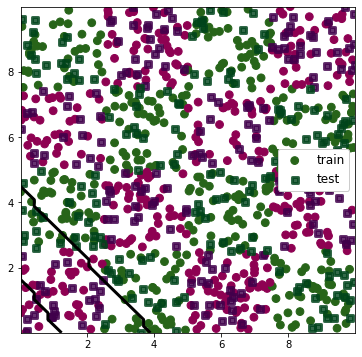

In [6]:
size = 16
length = 10
n_samples = 1000

X, y = make_checkerboard(size, n_samples, length, noise=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPClassifier(hidden_layer_sizes=[2], max_iter=500)
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = np.argmax(clf.predict_proba(X_test), axis=1)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, True)

FIT TIME: 0.67212(s)
PREDICT TIME: 0.00803(s)
Accuracy: 89.394%
Accuracy on train set: 90.0%
AUC: 0.89411
F1: 89.426%
Number of parameters: 6


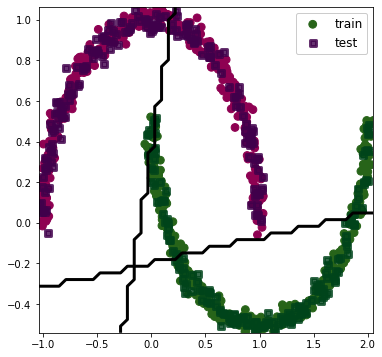

In [14]:
X, y = make_moons(n_samples, noise=0.03)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPClassifier(hidden_layer_sizes=[2], max_iter=500)
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = np.argmax(clf.predict_proba(X_test), axis=1)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, True)

FIT TIME: 0.43228(s)
PREDICT TIME: 0.0(s)
Accuracy: 60.606%
Accuracy on train set: 61.642%
AUC: 0.60594
F1: 59.375%
Number of parameters: 6


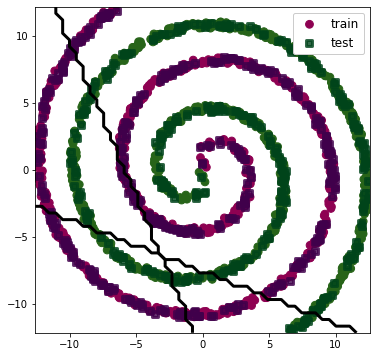

In [84]:
X, y = make_spirals(n_samples, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPClassifier(hidden_layer_sizes=[2], max_iter=500)
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = np.argmax(clf.predict_proba(X_test), axis=1)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, True)

### Parameters

In [324]:
n_hidden_layers = [1, 2, 3, 4]
n_neurons = [10, 30, 100, 300, 1000]
hidden_layer_sizes = np.repeat(n_neurons[0], n_hidden_layers[-1])
n_samples = [1000, 10000, 100000]
train_size = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
alpha = np.arange(1e-5, 1e2, 10)
solver = ['lbfgs', 'adam']
datasets = ['checkerboard', 'moons', 'spirals']
columns=['solver', 'n layers', 'n neurons', 'alpha', 
           'accuracy', 'accuracy train', 'auc', 'f1', 
           'fit time', 'predict time', 'n parameters', 
           'train size', 'n samples', 'set name']
checkerboard_size = 16
checkerboard_length = 10

n_hidden_layers_def = n_hidden_layers[0]
n_neurons_def = n_neurons[0]
alpha_def = alpha[0]
train_size_def = train_size[-2]

### Parameter testing

In [325]:
def get_scores(dataset, n_hidden_layers, n_neurons, alpha, solver):
    X_train, X_test, y_train, y_test = dataset
    hidden_layer_sizes = np.repeat(n_neurons, n_hidden_layers)
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                        max_iter=500, alpha=alpha, solver=solver)
    tic = time.time()
    clf.fit(X_train, y_train)
    fit_time = np.round(time.time() - tic, 5)
    tic = time.time()
    y_pred = clf.predict(X_test)
    predict_time = np.round(time.time() - tic, 5)
    y_score = np.argmax(clf.predict_proba(X_test), axis=1)
    accuracy = np.round(accuracy_score(y_test, y_pred)*100, 3)
    y_pred_train = clf.predict(X_train)
    accuracy_train = np.round(accuracy_score(y_train, y_pred_train)*100, 3)
    auc = np.round(roc_auc_score(y_test, y_score), 5)
    f1 = np.round(f1_score(y_test, y_pred)*100, 3)
    n_params = params_counter(clf)
    return [solver, n_hidden_layers, n_neurons, alpha, accuracy, accuracy_train, auc, f1, fit_time, predict_time, n_params]

In [326]:
df = pd.DataFrame(columns=columns)

def parameter_testing(dataset, dataset_name, solver, j):
    df = pd.DataFrame(columns=columns)
    for i in n_hidden_layers:
        data = get_scores(dataset, i, n_neurons_def, alpha_def, solver) + [train_size_def, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)
        
    for i in n_neurons:
        data = get_scores(dataset, n_hidden_layers_def, i, alpha_def, solver) + [train_size_def, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)

    for i in alpha:
        data = get_scores(dataset, n_hidden_layers_def, n_neurons_def, i, solver) + [train_size_def, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)

    for i in train_size:
        dataset = train_test_split(X, y, test_size=1-i)
        data = get_scores(dataset, n_hidden_layers_def, n_neurons_def, alpha_def, solver) + [i, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)
        
    return df

for s in solver:
    for j in n_samples:
        X, y = make_checkerboard(checkerboard_size, j, checkerboard_length, noise=False)
        dataset = train_test_split(X, y, test_size=1-train_size_def)
        idf = parameter_testing(dataset, "checkerboard", s, j)
        df = df.append(idf, ignore_index=True)
    
        X, y = make_moons(j, noise=0.03)
        dataset = train_test_split(X, y, test_size=1-train_size_def)
        idf = parameter_testing(dataset, "moons", s, j)
        df = df.append(idf, ignore_index=True)

        X, y = make_spirals(j, noise=0.5)
        dataset = train_test_split(X, y, test_size=1-train_size_def)
        idf = parameter_testing(dataset, "spirals", s, j)
        df = df.append(idf, ignore_index=True)

In [338]:
df.to_csv("sklearn_results.csv")
df
# table korytarz

,solver,n layers,n neurons,alpha,accuracy,accuracy train,auc,f1,fit time,predict time,n parameters,train size,n samples,set name
0,lbfgs,1,10,0.00001,69.500,74.500,0.69324,72.584,0.23183,0.00000,30,0.20,1000,checkerboard
1,lbfgs,2,10,0.00001,70.250,82.500,0.70088,73.077,0.26955,0.00000,130,0.20,1000,checkerboard
2,lbfgs,3,10,0.00001,63.250,67.000,0.63151,65.574,0.36977,0.00000,230,0.20,1000,checkerboard
3,lbfgs,4,10,0.00001,76.125,91.000,0.76037,77.556,0.40099,0.00000,330,0.20,1000,checkerboard
4,lbfgs,1,10,0.00001,64.000,71.500,0.63674,69.937,0.13151,0.00000,30,0.20,1000,checkerboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,adam,1,10,0.00001,54.491,53.075,0.54491,55.628,2.09746,0.04033,30,0.02,100000,spirals
500,adam,1,10,0.00001,54.105,54.410,0.54106,54.684,2.47968,0.03033,30,0.05,100000,spirals
501,adam,1,10,0.00001,51.919,51.870,0.51919,51.970,3.75783,0.03124,30,0.10,100000,spirals
502,adam,1,10,0.00001,53.562,53.720,0.53562,53.603,7.40713,0.03025,30,0.20,100000,spirals


### Interpretating results

In [330]:
df_sklearn = pd.read_csv("sklearn_results.csv", index_col=0)
df_sklearn_checkerboard = df_sklearn[df_sklearn["set name"] == "checkerboard"]
df_sklearn_moons = df_sklearn[df_sklearn["set name"] == "moons"]
df_sklearn_spirals = df_sklearn[df_sklearn["set name"] == "spirals"]

### Accuracy vs F1 for 10 neurons and  variable number of hidden layers

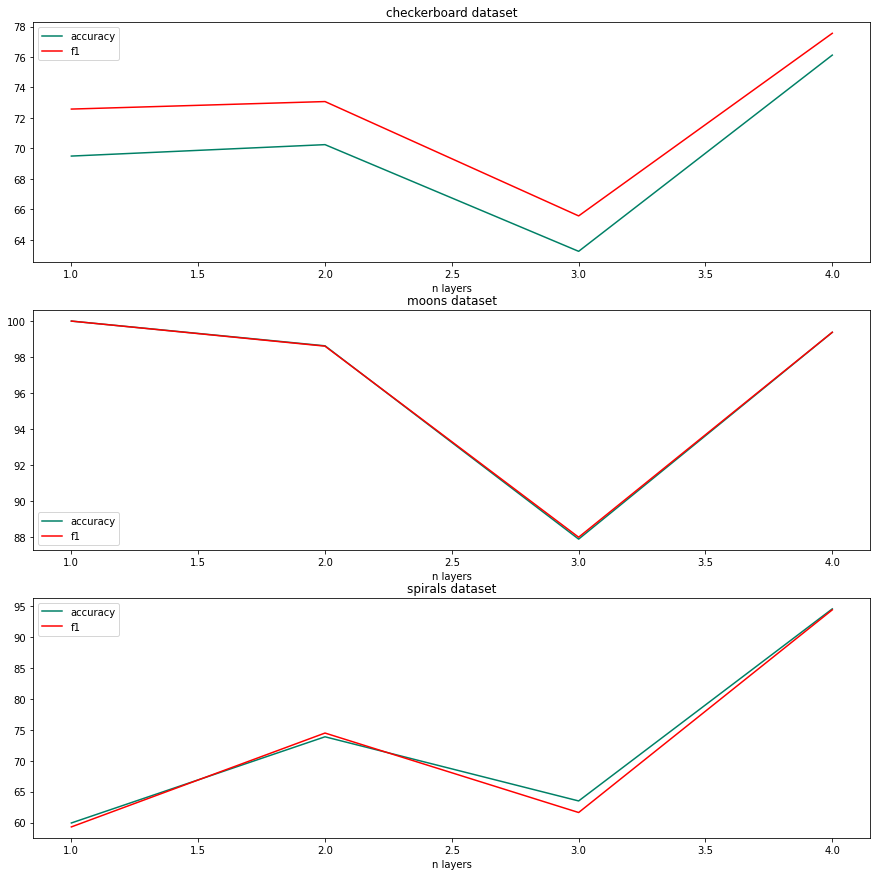

In [381]:
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title("checkerboard dataset")
df_sklearn_checkerboard.iloc[:4, :].plot(x="n layers", y = "accuracy", ax=axs[0], colormap='summer')
df_sklearn_checkerboard.iloc[:4, :].plot(x="n layers", y = "f1", ax=axs[0], colormap='autumn')
axs[1].set_title("moons dataset")
df_sklearn_moons.iloc[:4, :].plot(x="n layers", y = "accuracy", ax=axs[1], colormap='summer')
df_sklearn_moons.iloc[:4, :].plot(x="n layers", y = "f1", ax=axs[1], colormap='autumn')
axs[2].set_title("spirals dataset")
df_sklearn_spirals.iloc[:4, :].plot(x="n layers", y = "accuracy", ax=axs[2], colormap='summer')
df_sklearn_spirals.iloc[:4, :].plot(x="n layers", y = "f1", ax=axs[2], colormap='autumn')
plt.show()

### Accuracy vs F1 for 1 hidden layer and variable number of neurons

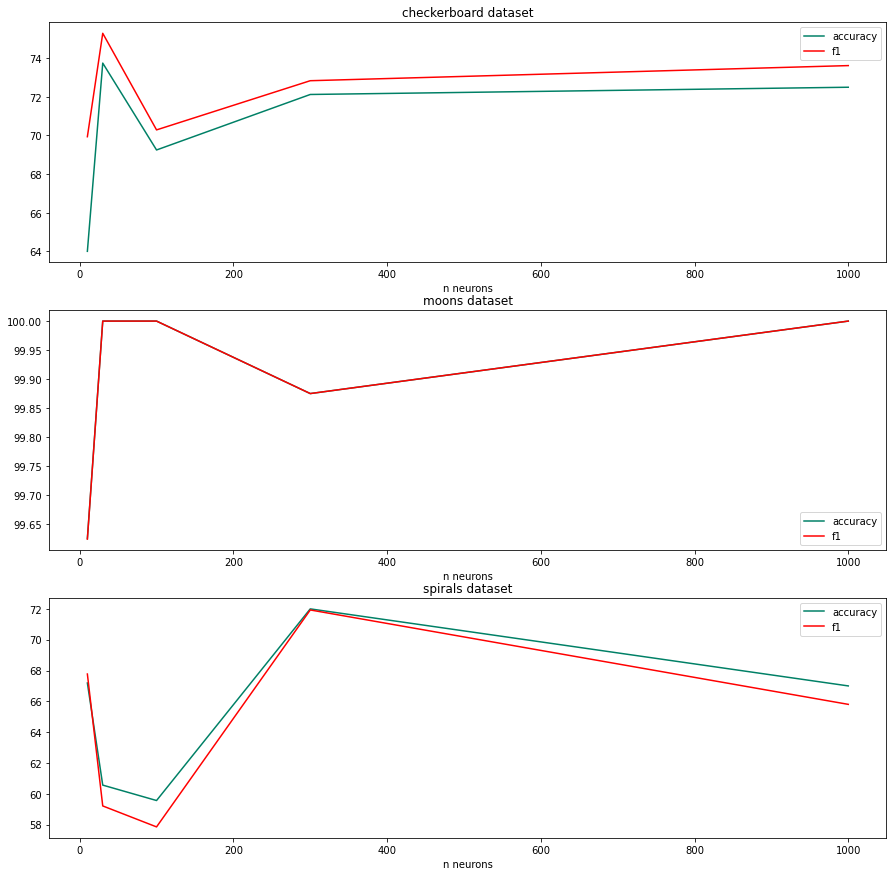

In [382]:
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title("checkerboard dataset")
df_sklearn_checkerboard.iloc[4:9, :].plot(x="n neurons", y = "accuracy", ax=axs[0], colormap='summer')
df_sklearn_checkerboard.iloc[4:9, :].plot(x="n neurons", y = "f1", ax=axs[0], colormap='autumn')
axs[1].set_title("moons dataset")
df_sklearn_moons.iloc[4:9, :].plot(x="n neurons", y = "accuracy", ax=axs[1], colormap='summer')
df_sklearn_moons.iloc[4:9, :].plot(x="n neurons", y = "f1", ax=axs[1], colormap='autumn')
axs[2].set_title("spirals dataset")
df_sklearn_spirals.iloc[4:9, :].plot(x="n neurons", y = "accuracy", ax=axs[2], colormap='summer')
df_sklearn_spirals.iloc[4:9, :].plot(x="n neurons", y = "f1", ax=axs[2], colormap='autumn')
plt.show()

### Accuracy vs F1 for 2 layers and variable penalty parameter for spirals dataset

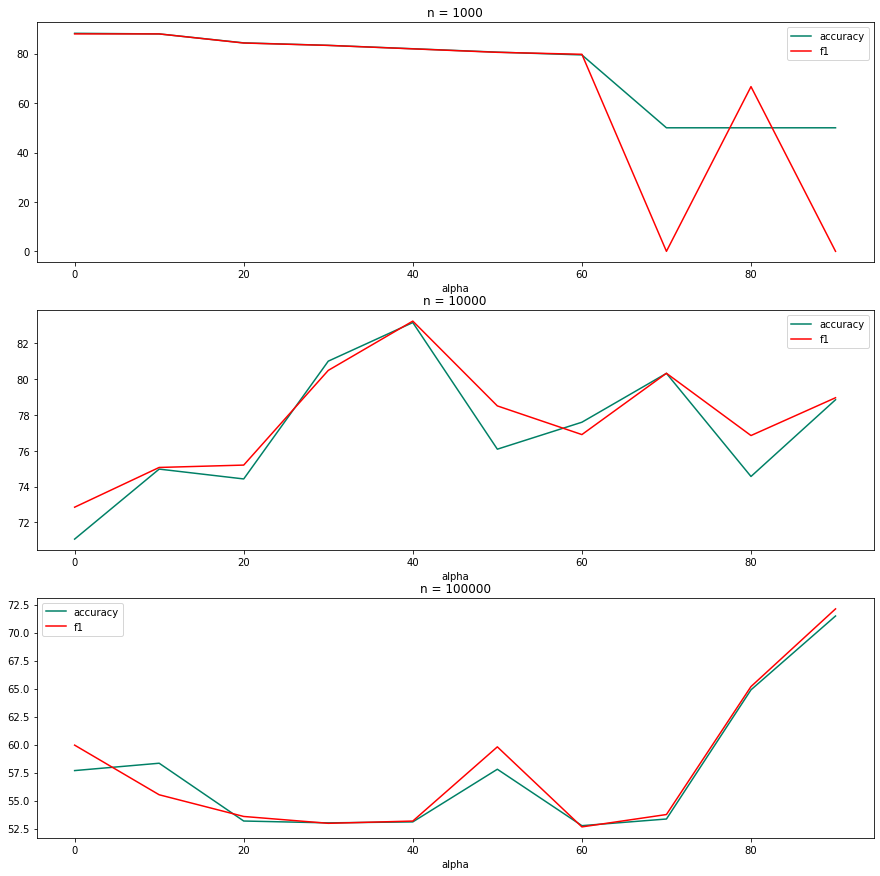

In [398]:
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title("n = 1000")
df_sklearn.iloc[37:47, :].plot(x="alpha", y = "accuracy", ax=axs[0], colormap='summer')
df_sklearn.iloc[37:47, :].plot(x="alpha", y = "f1", ax=axs[0], colormap='autumn')
axs[1].set_title("n = 10000")
df_sklearn.iloc[149:159, :].plot(x="alpha", y = "accuracy", ax=axs[1], colormap='summer')
df_sklearn.iloc[149:159, :].plot(x="alpha", y = "f1", ax=axs[1], colormap='autumn')
axs[2].set_title("n = 100000")
df_sklearn.iloc[233:243, :].plot(x="alpha", y = "accuracy", ax=axs[2], colormap='summer')
df_sklearn.iloc[233:243, :].plot(x="alpha", y = "f1", ax=axs[2], colormap='autumn')
plt.show()

In [370]:
print("n samples = 1000")
print("max accuracy for checkerboard:", np.max(df_sklearn_checkerboard[df_sklearn_checkerboard["n samples"] == 1000]["accuracy"]), "%")
print("max accuracy for moons:", np.max(df_sklearn.loc[(df_sklearn["set name"] == "moons") & (df_sklearn["n samples"] == 1000)]["accuracy"]), "%")
print("max accuracy for spirals:", np.round(np.max(df_sklearn.loc[(df_sklearn["set name"] == "spirals") & (df_sklearn["n samples"] == 1000)]["accuracy"]), 3), "%")

n samples = 1000
max accuracy for checkerboard: 76.125 %
max accuracy for moons: 100.0 %
max accuracy for spirals: 94.562 %


### Accuracy on train datasets for "adam" and "lbfgs"

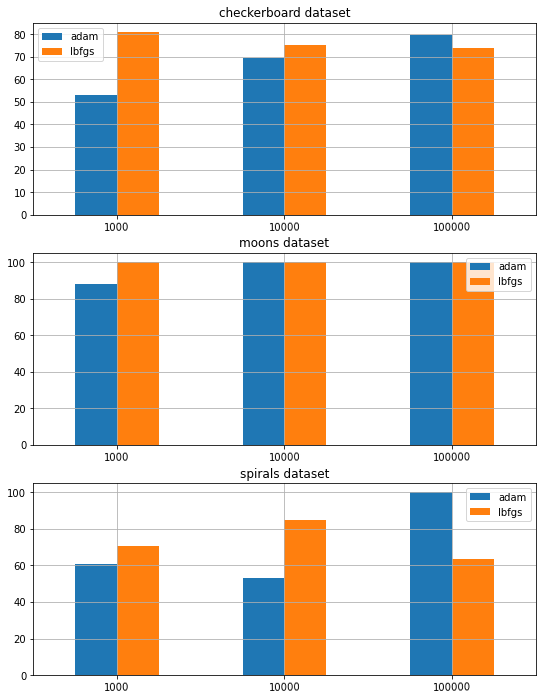

In [333]:
fig, axs = plt.subplots(3, figsize=(9, 12))
acc_checkerboard_adam = np.array(df_sklearn_checkerboard.loc[(df_sklearn_checkerboard["n neurons"]==30)
                                              & (df_sklearn_checkerboard["solver"]=="adam")]["accuracy train"])
acc_checkerboard_lbfgs = np.array(df_sklearn_checkerboard.loc[(df_sklearn_checkerboard["n neurons"]==30)
                                              & (df_sklearn_checkerboard["solver"]=="lbfgs")]["accuracy train"])
acc_df_checkerboard = pd.DataFrame({'adam': acc_checkerboard_adam, 'lbfgs': acc_checkerboard_lbfgs}, 
                                   index=n_samples)
acc_df_checkerboard.plot.bar(rot=1, ax=axs[0])
plt.grid()
acc_moons_adam = np.array(df_sklearn_moons.loc[(df_sklearn_moons["n neurons"]==30)
                                              & (df_sklearn_moons["solver"]=="adam")]["accuracy train"])
acc_moons_lbfgs = np.array(df_sklearn_moons.loc[(df_sklearn_moons["n neurons"]==30)
                                              & (df_sklearn_moons["solver"]=="lbfgs")]["accuracy train"])
acc_df_moons = pd.DataFrame({'adam': acc_moons_adam, 'lbfgs': acc_moons_lbfgs}, 
                                   index=n_samples)
acc_df_moons.plot.bar(rot=1, ax=axs[1])
plt.grid()
acc_spirals_adam = np.array(df_sklearn_spirals.loc[(df_sklearn_spirals["n neurons"]==30)
                                              & (df_sklearn_spirals["solver"]=="adam")]["accuracy train"])
acc_spirals_lbfgs = np.array(df_sklearn_spirals.loc[(df_sklearn_spirals["n neurons"]==30)
                                              & (df_sklearn_spirals["solver"]=="lbfgs")]["accuracy train"])
acc_df_spirals = pd.DataFrame({'adam': acc_spirals_adam, 'lbfgs': acc_spirals_lbfgs}, 
                                   index=n_samples)
acc_df_spirals.plot.bar(rot=1, ax=axs[2])
axs[0].set_title("checkerboard dataset")
axs[0].grid()
axs[1].set_title("moons dataset")
axs[1].grid()
axs[2].set_title("spirals dataset")
axs[2].grid()
plt.show()

### Fit time for "adam" and "lbfgs" for variable size of datasets

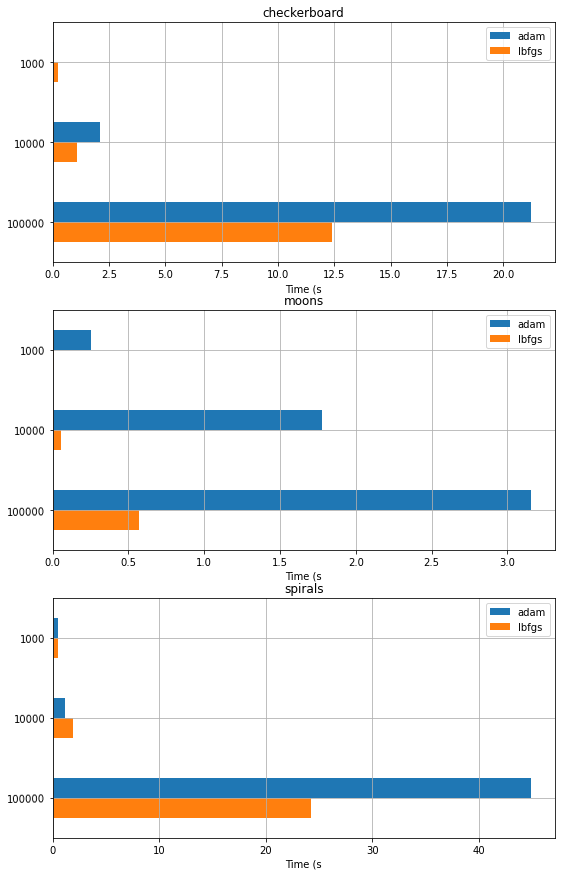

In [334]:
fig, axs = plt.subplots(3, figsize=(9, 15))
acc_checkerboard_adam = np.array(df_sklearn_checkerboard.loc[(df_sklearn_checkerboard["n neurons"]==30)
                                              & (df_sklearn_checkerboard["solver"]=="adam")]["fit time"])
acc_checkerboard_lbfgs = np.array(df_sklearn_checkerboard.loc[(df_sklearn_checkerboard["n neurons"]==30)
                                              & (df_sklearn_checkerboard["solver"]=="lbfgs")]["fit time"])
acc_df_checkerboard = pd.DataFrame({'adam': acc_checkerboard_adam, 'lbfgs': acc_checkerboard_lbfgs}, 
                                   index=n_samples)
acc_df_checkerboard.plot.barh(rot=1, ax=axs[0])
acc_moons_adam = np.array(df_sklearn_moons.loc[(df_sklearn_moons["n neurons"]==30)
                                              & (df_sklearn_moons["solver"]=="adam")]["fit time"])
acc_moons_lbfgs = np.array(df_sklearn_moons.loc[(df_sklearn_moons["n neurons"]==30)
                                              & (df_sklearn_moons["solver"]=="lbfgs")]["fit time"])
acc_df_moons = pd.DataFrame({'adam': acc_moons_adam, 'lbfgs': acc_moons_lbfgs}, 
                                   index=n_samples)
acc_df_moons.plot.barh(rot=1, ax=axs[1])
acc_spirals_adam = np.array(df_sklearn_spirals.loc[(df_sklearn_spirals["n neurons"]==30)
                                              & (df_sklearn_spirals["solver"]=="adam")]["fit time"])
acc_spirals_lbfgs = np.array(df_sklearn_spirals.loc[(df_sklearn_spirals["n neurons"]==30)
                                              & (df_sklearn_spirals["solver"]=="lbfgs")]["fit time"])
acc_df_spirals = pd.DataFrame({'adam': acc_spirals_adam, 'lbfgs': acc_spirals_lbfgs}, 
                                   index=n_samples)
acc_df_spirals.plot.barh(rot=1, ax=axs[2])
for i in range(3):
    axs[i].grid()
    axs[i].set_xlabel('Time (s')
    axs[i].invert_yaxis()
    axs[i].set_title(datasets[i])
plt.show()

### Mutliple layer network vs one hidden layer network with similiar number of parameters

In [323]:
df_sklearn.loc[(df_sklearn["n parameters"] > 250) 
                            & (df_sklearn["n parameters"] < 350)].loc[:, 
                            ["solver", "n layers", "n neurons", "accuracy", "fit time", "set name"]]
#super table

,solver,n layers,n neurons,accuracy,fit time,set name
3,lbfgs,4,10,80.000,0.43231,checkerboard
6,lbfgs,1,100,70.250,0.57934,checkerboard
31,lbfgs,4,10,100.000,0.04688,moons
34,lbfgs,1,100,100.000,0.04687,moons
59,lbfgs,4,10,80.750,0.60162,spirals
62,lbfgs,1,100,67.312,0.87112,spirals
87,adam,4,10,78.000,0.54814,checkerboard
90,adam,1,100,69.875,0.55462,checkerboard
115,adam,4,10,100.000,0.36327,moons
118,adam,1,100,96.500,0.53247,moons


### Creating a base mlp class 

In [19]:
class MLPBase():
    def __init__(self, layers=None, threshold = 0.5):
        self.coefs_ = []
        self.intercepts_ = []
        self.layers = layers
        self.threshold = threshold
        self.params = {"layers": self.layers, "threshold": self.threshold}
        
    def decision_fun(self, X, coefs, intercepts):
        return np.array([coefs.dot(xi) + intercepts for xi in X])
    
    def activation_fun(self, power):
        return 1 / (1 + np.exp(-power))
    
    def predict_proba(self, X):
        if len(self.layers) > 1:
            v = self.activation_fun(self.decision_fun(X, self.coefs_[0], self.intercepts_[0]))
        else:
            v = X
        y = np.ravel(self.activation_fun(self.decision_fun(v, self.coefs_[-1], self.intercepts_[-1])))
        return y
    
    def predict(self, X):
        y_pred = (self.threshold < self.predict_proba(X)) * 1
        return y_pred
    
    def get_params(self, deep=True): 
        print(self.params)
    
    def set_params(self, parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

### MLPextreme class implementation

In [20]:
class MLPextreme(MLPBase):
    def __init__(self, **kwargs):
        MLPBase.__init__(self, **kwargs)
    
    def fit(self, X, y):
        [m, n] = X.shape
        
        rand_idx = np.random.randint(m, size=(self.layers[0], 2))
        self.coefs_.append(np.array(X[rand_idx[:,0],:]-X[rand_idx[:,1],:]))
        self.intercepts_.append((self.coefs_[0] * X[rand_idx[:, 0]]).sum(axis=1))

        v = self.activation_fun(self.decision_fun(X, self.coefs_[0], self.intercepts_[0]))
        clf = LogisticRegression()
        clf.fit(v, y)

        self.coefs_.append(clf.coef_)
        self.intercepts_.append(clf.intercept_)

FIT TIME: 0.00799(s)
PREDICT TIME: 0.004(s)
Accuracy: 84.545%
Accuracy on train set: 89.104%
AUC: 0.94344
F1: 85.634%
Number of parameters: 15


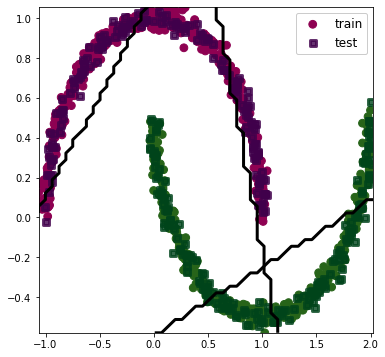

In [42]:
X, y = make_moons(1000, noise=0.03)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPextreme(layers=[5, 1])
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = clf.predict_proba(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, False)

FIT TIME: 0.0(s)
PREDICT TIME: 0.0156(s)
Accuracy: 54.242%
Accuracy on train set: 55.746%
AUC: 0.59253
F1: 55.06%
Number of parameters: 15


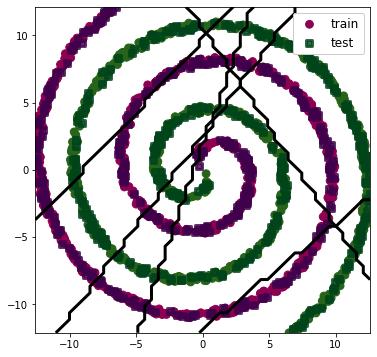

In [43]:
X, y = make_spirals(1000, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPextreme(layers=[5, 1])
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = clf.predict_proba(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, False)

### Backpropagation implementation

In [21]:
class MLPbackprop(MLPBase):   
    def __init__(self, learning_rate=0.5, error=0.1, max_iter=1000, **kwargs):
        MLPBase.__init__(self, **kwargs)
        self.learning_rate = learning_rate
        self.error = error
        self.max_iter = 1000
        self.params = {**self.params, **{"learning_rate": self.learning_rate, 
                                         "error": self.error}}
    
    def fit(self, X, y):
        [m, n] = X.shape
        for i, li in enumerate(self.layers):
            if i == 0:
                self.coefs_.append(np.array(np.random.randn(li, n), dtype='float'))
            else:
                self.coefs_.append(np.array(np.random.randn(li, self.layers[i-1]), dtype='float'))
            self.intercepts_.append(np.array(np.random.randn(li), dtype='float'))
            
        for idx in range(self.max_iter):
            if len(self.layers) > 1:
                v = self.activation_fun(self.decision_fun(X, self.coefs_[0], self.intercepts_[0]))
            else:
                v = X
            y_pred = np.ravel(self.activation_fun(self.decision_fun(v, self.coefs_[-1], self.intercepts_[-1])))
            
            error = np.sum(y - y_pred) ** 2
            if error <= self.error:
                break
            
            delta = (y_pred - y) * y_pred * (1 - y_pred)
            diff_w_out = self.learning_rate * np.mean(1/2 * 2 * delta.reshape(-1, 1) * v, axis=0)
            diff_b_out = self.learning_rate * np.mean(1/2 * 1 * delta, axis=0)

            if len(self.layers) > 1:
                coefs = np.repeat(np.squeeze(self.coefs_[-1]), delta.shape[0], axis=0).reshape(self.coefs_[-1].shape[1], delta.shape[0]).T  
                diff_w_hidden = self.learning_rate * (delta.reshape(-1, 1) * coefs * v * (1 - v)).T.dot(X)
                diff_b_hidden = self.learning_rate * (delta.reshape(-1, 1) * coefs * v * (1 - v)).sum()

                self.coefs_[0] -= diff_w_hidden
                self.intercepts_[0] -= diff_b_hidden
                
            self.coefs_[-1] -= diff_w_out
            self.intercepts_[-1] -= diff_b_out

FIT TIME: 1.48818(s)
PREDICT TIME: 0.0(s)
Accuracy: 85.152%
Accuracy on train set: 89.254%
AUC: 0.95835
F1: 83.828%
Number of parameters: 2


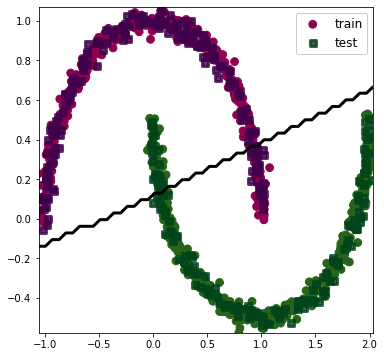

In [54]:
X, y = make_moons(1000, noise=0.03)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPbackprop(layers=[1])
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = clf.predict_proba(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, False)

FIT TIME: 0.66928(s)
PREDICT TIME: 0.0(s)
Accuracy: 96.97%
Accuracy on train set: 98.209%
AUC: 0.99897
F1: 96.815%
Number of parameters: 15


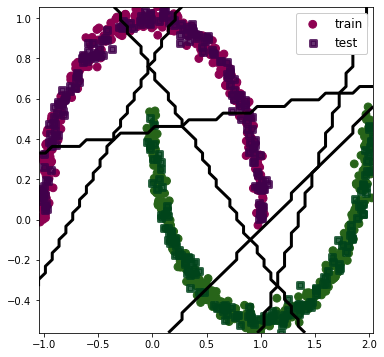

In [48]:
X, y = make_moons(1000, noise=0.03)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPbackprop(layers=[5, 1])
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = clf.predict_proba(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, False)

FIT TIME: 0.99336(s)
PREDICT TIME: 0.00203(s)
Accuracy: 58.182%
Accuracy on train set: 62.015%
AUC: 0.59606
F1: 53.691%
Number of parameters: 15


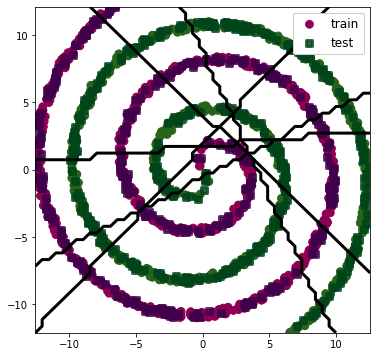

In [45]:
X, y = make_spirals(1000, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPbackprop(layers=[5, 1])
tic = time.time()
clf.fit(X_train, y_train)
print(f"FIT TIME: {np.round(time.time() - tic, 5)}(s)")
tic = time.time()
y_pred = clf.predict(X_test)
print(f"PREDICT TIME: {np.round(time.time() - tic, 5)}(s)")
y_score = clf.predict_proba(X_test)
print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")
y_pred_train = clf.predict(X_train)
print(f"Accuracy on train set: {np.round(accuracy_score(y_train, y_pred_train)*100, 3)}%")
print(f"AUC: {np.round(roc_auc_score(y_test, y_score), 5)}")
print(f"F1: {np.round(f1_score(y_test, y_pred)*100, 3)}%")
print(f"Number of parameters: {params_counter(clf)}")
plot_results([X_train, X_test, y_train, y_test], clf, False)

### MLPextreme testing

In [328]:
df = pd.DataFrame(columns=columns)

columns=['n layers', 'n neurons', 'accuracy', 'accuracy train', 'auc', 'f1', 
         'fit time', 'predict time', 'n parameters', 'train size', 'n samples', 
         'set name']

def get_scores(dataset, n_neurons):
    X_train, X_test, y_train, y_test = dataset
    clf = MLPextreme(layers=[n_neurons, 1])
    tic = time.time()
    clf.fit(X_train, y_train)
    fit_time = np.round(time.time() - tic, 5)
    tic = time.time()
    y_pred = clf.predict(X_test)
    predict_time = np.round(time.time() - tic, 5)
    y_score = clf.predict_proba(X_test)
    accuracy = np.round(accuracy_score(y_test, y_pred)*100, 3)
    y_pred_train = clf.predict(X_train)
    accuracy_train = np.round(accuracy_score(y_train, y_pred_train)*100, 3)
    auc = np.round(roc_auc_score(y_test, y_score), 5)
    f1 = np.round(f1_score(y_test, y_pred)*100, 3)
    n_params = params_counter(clf)
    return [2, n_neurons, accuracy, accuracy_train, auc, f1, fit_time, predict_time, n_params]

def parameter_testing(dataset, dataset_name, j):
    df = pd.DataFrame(columns=columns)

    for i in n_neurons:
        data = get_scores(dataset, i) + [train_size_def, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)

    for i in train_size[2:]:
        dataset = train_test_split(X, y, test_size=1-i)
        data = get_scores(dataset, n_neurons_def) + [i, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)

    return df

for j in n_samples:
    X, y = make_checkerboard(checkerboard_size, j, checkerboard_length, noise=False)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "checkerboard", j)
    df = df.append(idf, ignore_index=True)

    X, y = make_moons(j, noise=0.03)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "moons", j)
    df = df.append(idf, ignore_index=True)

    X, y = make_spirals(j, noise=0.5)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "spirals", j)
    df = df.append(idf, ignore_index=True)

In [403]:
# df.to_csv("extreme_results.csv")
df_extreme = pd.read_csv("extreme_results.csv", index_col=0)
# table korytarz
df_extreme.iloc[:, 2:]

,n neurons,alpha,accuracy,accuracy train,auc,f1,fit time,predict time,n parameters,train size,n samples,set name
0,10,NaN,49.125,55.500,0.59844,65.884,0.01562,0.00000,30,0.20,1000,checkerboard
1,30,NaN,65.000,66.500,0.71763,70.464,0.01564,0.00000,90,0.20,1000,checkerboard
2,100,NaN,68.875,72.500,0.76055,72.486,0.03126,0.01564,300,0.20,1000,checkerboard
3,300,NaN,74.875,79.500,0.84885,76.923,0.05340,0.01562,900,0.20,1000,checkerboard
4,1000,NaN,78.000,82.500,0.86368,79.294,0.06898,0.04688,3000,0.20,1000,checkerboard
...,...,...,...,...,...,...,...,...,...,...,...,...
103,10,NaN,62.871,63.175,0.70367,62.091,0.05953,0.97855,30,0.02,100000,spirals
104,10,NaN,69.708,69.330,0.76513,61.568,0.06249,0.97516,30,0.05,100000,spirals
105,10,NaN,62.521,62.420,0.68869,53.475,0.21619,0.88149,30,0.10,100000,spirals
106,10,NaN,58.630,58.590,0.63412,63.151,0.24735,0.79468,30,0.20,100000,spirals


### Backpropagation testing

In [32]:
df = pd.DataFrame(columns=columns)

def get_scores(dataset, n_layers, n_neurons):
    X_train, X_test, y_train, y_test = dataset
    if n_layers == 1:
        layers = [1]
    else:
        layers = [n_neurons, 1]
    clf = MLPbackprop(layers=layers)
    tic = time.time()
    clf.fit(X_train, y_train)
    fit_time = np.round(time.time() - tic, 5)
    tic = time.time()
    y_pred = clf.predict(X_test)
    predict_time = np.round(time.time() - tic, 5)
    y_score = clf.predict_proba(X_test)
    accuracy = np.round(accuracy_score(y_test, y_pred)*100, 3)
    y_pred_train = clf.predict(X_train)
    accuracy_train = np.round(accuracy_score(y_train, y_pred_train)*100, 3)
    auc = np.round(roc_auc_score(y_test, y_score), 5)
    f1 = np.round(f1_score(y_test, y_pred)*100, 3)
    n_params = params_counter(clf)
    return [n_layers, n_neurons, accuracy, accuracy_train, auc, f1, fit_time, predict_time, n_params]

def parameter_testing(dataset, dataset_name, j):
    df = pd.DataFrame(columns=columns)

    for i in n_neurons:
        data = get_scores(dataset, 2, i) + [train_size_def, j, dataset_name]
        idf = pd.DataFrame([data], columns=columns)
        df = df.append(idf, ignore_index=True)

    for l in [1, 2]:
        for i in train_size[1:]:
            if l == 1:
                n_neurons_ = np.nan
            else:
                n_neurons_ = n_neurons_def
            dataset = train_test_split(X, y, test_size=1-i)
            data = get_scores(dataset, l, n_neurons_) + [i, j, dataset_name]
            idf = pd.DataFrame([data], columns=columns)
            df = df.append(idf, ignore_index=True)

    return df

for j in n_samples:
    X, y = make_checkerboard(checkerboard_size, j, checkerboard_length, noise=False)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "checkerboard", j)
    df = df.append(idf, ignore_index=True)

    X, y = make_moons(j, noise=0.03)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "moons", j)
    df = df.append(idf, ignore_index=True)

    X, y = make_spirals(j, noise=0.5)
    dataset = train_test_split(X, y, test_size=1-train_size_def)
    idf = parameter_testing(dataset, "spirals", j)
    df = df.append(idf, ignore_index=True)

In [239]:
df.to_csv("backprop_results.csv")
df_backprop = pd.read_csv("backprop_results.csv", index_col=0)
# table korytarz

### Interpretating backpropagation result 

In [90]:
df_backprop_checkerboard = df_backprop[df_backprop["set name"] == "checkerboard"]
df_backprop_moons = df_backprop[df_backprop["set name"] == "moons"]
df_backprop_spirals = df_backprop[df_backprop["set name"] == "spirals"]

### Accuracy vs F1 for 2 layers and variable number of neurons in hidden layer

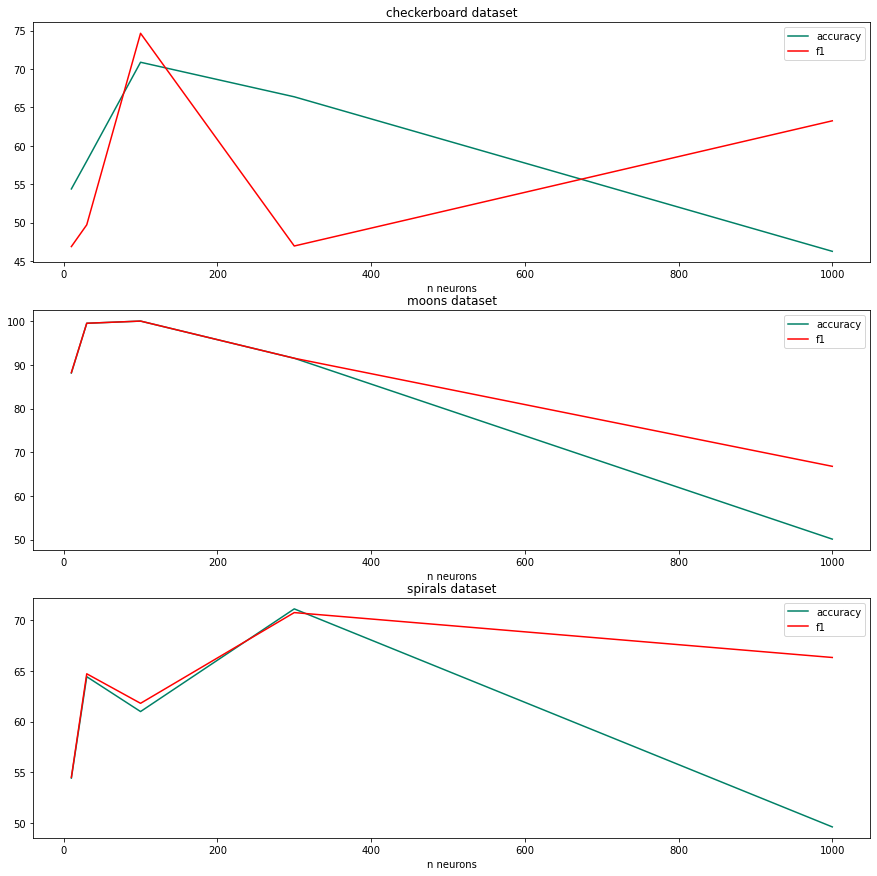

In [108]:
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title("checkerboard dataset")
df_backprop_checkerboard.iloc[:5, :].plot(x="n neurons", y = "accuracy", ax=axs[0], colormap='summer')
df_backprop_checkerboard.iloc[:5, :].plot(x="n neurons", y = "f1", ax=axs[0], colormap='autumn')
axs[1].set_title("moons dataset")
df_backprop_moons.iloc[:5, :].plot(x="n neurons", y = "accuracy", ax=axs[1], colormap='summer')
df_backprop_moons.iloc[:5, :].plot(x="n neurons", y = "f1", ax=axs[1], colormap='autumn')
axs[2].set_title("spirals dataset")
df_backprop_spirals.iloc[:5, :].plot(x="n neurons", y = "accuracy", ax=axs[2], colormap='summer')
df_backprop_spirals.iloc[:5, :].plot(x="n neurons", y = "f1", ax=axs[2], colormap='autumn')
plt.show()

### Accuracy vs F1 for 2 layers and variable train size

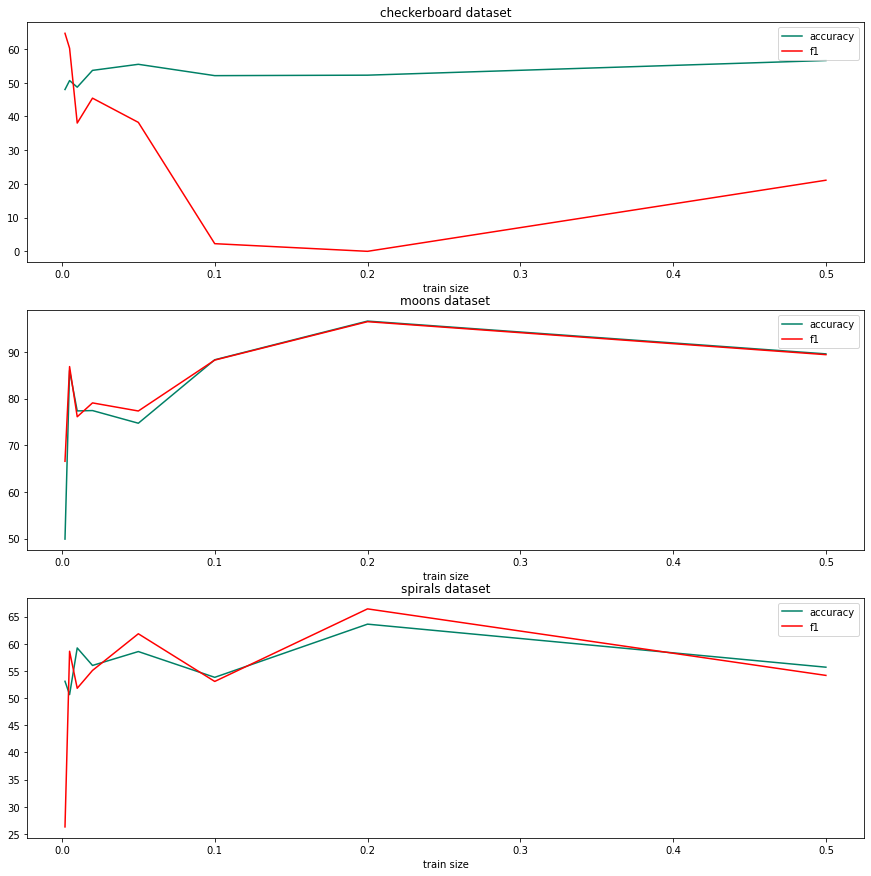

In [112]:
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title("checkerboard dataset")
df_backprop_checkerboard.iloc[13:21, :].plot(x="train size", y = "accuracy", ax=axs[0], colormap='summer')
df_backprop_checkerboard.iloc[13:21, :].plot(x="train size", y = "f1", ax=axs[0], colormap='autumn')
axs[1].set_title("moons dataset")
df_backprop_moons.iloc[13:21, :].plot(x="train size", y = "accuracy", ax=axs[1], colormap='summer')
df_backprop_moons.iloc[13:21, :].plot(x="train size", y = "f1", ax=axs[1], colormap='autumn')
axs[2].set_title("spirals dataset")
df_backprop_spirals.iloc[13:21, :].plot(x="train size", y = "accuracy", ax=axs[2], colormap='summer')
df_backprop_spirals.iloc[13:21, :].plot(x="train size", y = "f1", ax=axs[2], colormap='autumn')
plt.show()

### Time changing for variable number of neurons in hidden layer

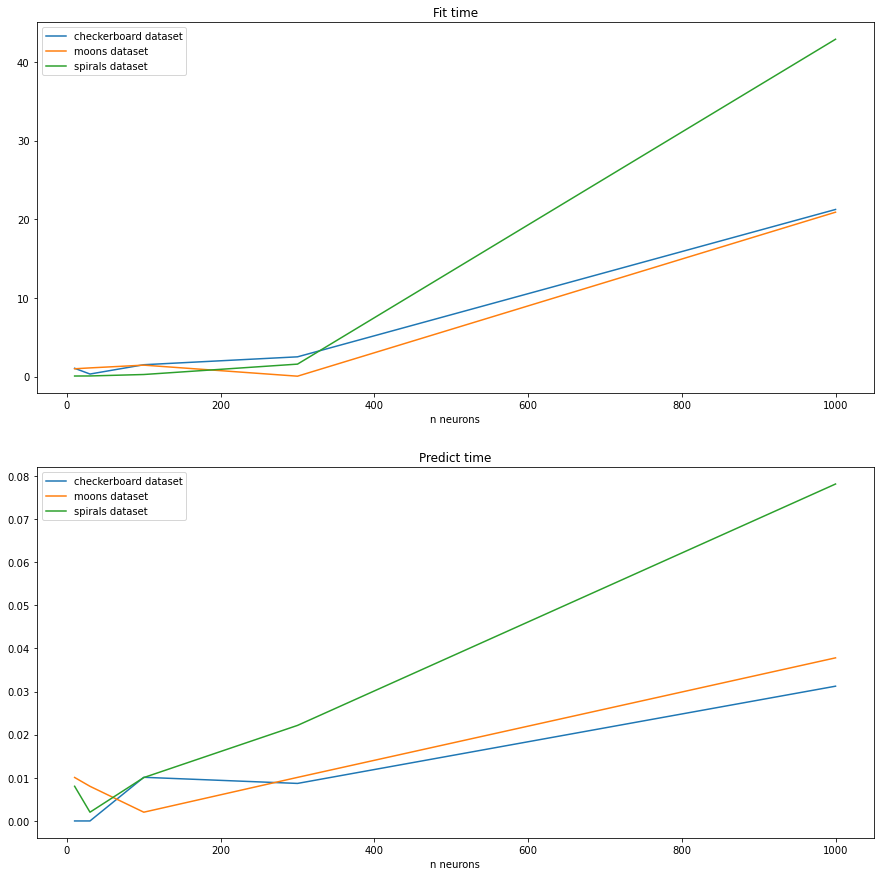

In [125]:
fig, axs = plt.subplots(2, figsize=(15, 15))
axs[0].set_title("Fit time")
df_backprop_checkerboard.iloc[:5, :].plot(x="n neurons", y = "fit time", ax=axs[0], label="checkerboard dataset")
df_backprop_moons.iloc[:5, :].plot(x="n neurons", y = "fit time", ax=axs[0], label="moons dataset")
df_backprop_spirals.iloc[:5, :].plot(x="n neurons", y = "fit time", ax=axs[0], label="spirals dataset")

axs[1].set_title("Predict time")
df_backprop_checkerboard.iloc[:5, :].plot(x="n neurons", y = "predict time", ax=axs[1], label="checkerboard dataset")
df_backprop_moons.iloc[:5, :].plot(x="n neurons", y = "predict time", ax=axs[1], label="moons dataset")
df_backprop_spirals.iloc[:5, :].plot(x="n neurons", y = "predict time", ax=axs[1], label="spirals dataset")
plt.show()

### Accuracy for different sizes of datasets and 30 neurons in hidden layer

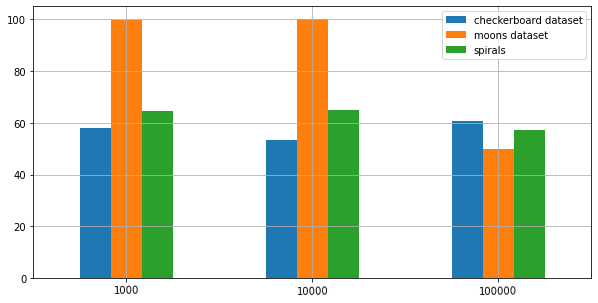

In [202]:
acc_checkerboard = np.array(df_backprop_checkerboard[df_backprop_checkerboard["n neurons"]==30]["accuracy"])
acc_moons = np.array(df_backprop_moons[df_backprop_moons["n neurons"]==30]["accuracy"])
acc_spirals = np.array(df_backprop_spirals[df_backprop_spirals["n neurons"]==30]["accuracy"])
acc_df = pd.DataFrame({'checkerboard dataset': acc_checkerboard, 'moons dataset': acc_moons, 
                       'spirals': acc_spirals}, index=n_samples)
fig, ax = plt.subplots(1, figsize=(10, 5))
acc_df.plot.bar(rot=1, ax=ax)
plt.grid()
plt.show()

### Accuracy for networks with one and two hidden layers

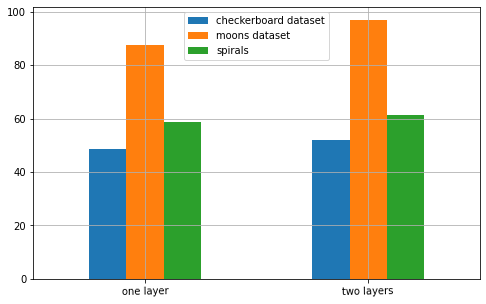

In [201]:
acc_checkerboard = np.array(df_backprop_checkerboard.loc[(df_backprop_checkerboard["train size"]==0.1) 
                                              & (df_backprop_checkerboard["n samples"]==10000)]["accuracy"])
acc_moons = np.array(df_backprop_moons.loc[(df_backprop_moons["train size"]==0.1) 
                                              & (df_backprop_moons["n samples"]==10000)]["accuracy"])
acc_spirals = np.array(df_backprop_spirals.loc[(df_backprop_spirals["train size"]==0.1) 
                                              & (df_backprop_spirals["n samples"]==10000)]["accuracy"])
acc_df = pd.DataFrame({'checkerboard dataset': acc_checkerboard, 'moons dataset': acc_moons, 
                       'spirals': acc_spirals}, index=["one layer", "two layers"])
fig, ax = plt.subplots(1, figsize=(8, 5))
acc_df.plot.bar(rot=1, ax=ax)
plt.grid()
plt.show()

### AUC for variable number of neurons in hidden layer

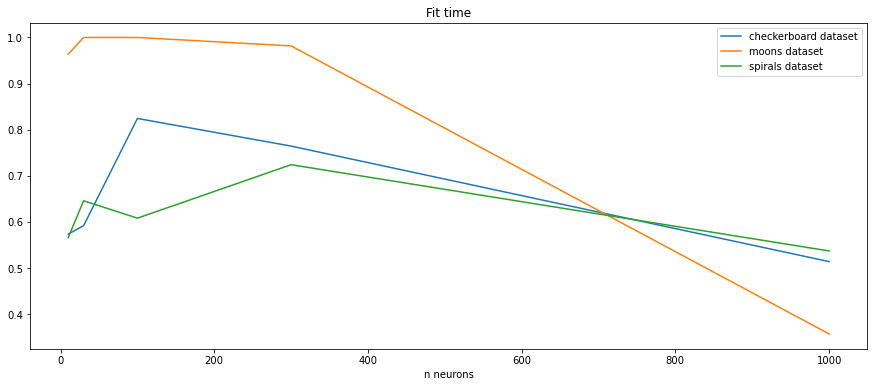

In [206]:
fig, ax = plt.subplots(1, figsize=(15, 6))
df_backprop_checkerboard.iloc[:5, :].plot(x="n neurons", y = "auc", ax=ax, label="checkerboard dataset")
df_backprop_moons.iloc[:5, :].plot(x="n neurons", y = "auc", ax=ax, label="moons dataset")
df_backprop_spirals.iloc[:5, :].plot(x="n neurons", y = "auc", ax=ax, label="spirals dataset")
plt.show()